## Imports and Data Set Up

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

c:\Users\asus\anaconda3\envs\envallen\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data_dir = "./allendata"

manifest_path = os.path.join(data_dir, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)
sessions = cache.get_session_table()

## Initial Session Filtering

- select the `brain_observatory_1.1`
- analyse the brain_observatory sessions
- narrow down based on unit_count and the available stimuli


In [4]:
brain_obs_sessions = sessions[(sessions.session_type == "brain_observatory_1.1")]

print(f"There are {len(brain_obs_sessions)} out of {len(sessions)} sessions to choose from.")

There are 32 out of 58 sessions to choose from.


In [5]:
brain_obs_sessions["unit_count"].describe()

count     32.000000
mean     682.562500
std      142.865589
min      444.000000
25%      564.750000
50%      654.500000
75%      824.250000
max      959.000000
Name: unit_count, dtype: float64

Let's only keep the upper half of sessions, those with at least 650 units. Let's also specify the regions we want to explore: VISp, VISl, VISal, VISpm, and VISam.

In [6]:
uh_brain_obs_sessions = brain_obs_sessions[(brain_obs_sessions["unit_count"] >= 650)]

required_regions = {"VISp", "VISl", "VISal", "VISpm", "VISam"}
regions_uh_brain_obs_sessions = uh_brain_obs_sessions[
    uh_brain_obs_sessions["ecephys_structure_acronyms"].apply(
        lambda x: all(region in str(x) for region in required_regions)
    )
]

regions_uh_brain_obs_sessions


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
750332458,2019-10-03T00:00:00Z,726141251,brain_observatory_1.1,91.0,M,wt/wt,902,2216,6,"[grey, VISrl, nan, VISal, IntG, IGL, LGd, CA3,..."
750749662,2019-10-03T00:00:00Z,726162197,brain_observatory_1.1,92.0,M,wt/wt,761,2223,6,"[LP, DG, CA1, VISp, nan, LGd, CA3, VISrl, VPM,..."
755434585,2019-10-03T00:00:00Z,730760270,brain_observatory_1.1,100.0,M,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,650,2220,6,"[grey, VISrl, nan, MGv, MGd, TH, LGd, CA3, DG,..."
756029989,2019-10-03T00:00:00Z,734865738,brain_observatory_1.1,96.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,684,2214,6,"[TH, DG, CA3, CA1, VISl, nan, PO, Eth, LP, VIS..."


Great! We have narrowed it down to 5 sessions. Let's download the first session, id="719161530".

In [7]:
session = cache.get_session_data(719161530)

c:\Users\asus\anaconda3\envs\envallen\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\asus\anaconda3\envs\envallen\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [8]:
table = session.get_stimulus_table()

table["stimulus_name"].unique()

table.head()

,stimulus_block,start_time,stop_time,x_position,stimulus_name,contrast,frame,phase,orientation,color,y_position,size,temporal_frequency,spatial_frequency,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
0,null,29.830107,89.896827,null,spontaneous,null,null,null,null,null,null,null,null,null,60.066720,0.0
1,0.0,89.896827,90.130356,10.0,gabors,0.8,null,"[3644.93333333, 3644.93333333]",0.0,null,-10.0,"[20.0, 20.0]",4.0,0.08,0.233528,1.0
2,0.0,90.130356,90.380565,-30.0,gabors,0.8,null,"[3644.93333333, 3644.93333333]",90.0,null,20.0,"[20.0, 20.0]",4.0,0.08,0.250209,2.0
3,0.0,90.380565,90.630774,20.0,gabors,0.8,null,"[3644.93333333, 3644.93333333]",0.0,null,-20.0,"[20.0, 20.0]",4.0,0.08,0.250209,3.0
4,0.0,90.630774,90.880983,30.0,gabors,0.8,null,"[3644.93333333, 3644.93333333]",90.0,null,20.0,"[20.0, 20.0]",4.0,0.08,0.250209,4.0


### Check value counts for each stimulus

In [9]:
print("719161530")
table["stimulus_name"].value_counts()

719161530


natural_movie_three     36000
natural_movie_one       18000
static_gratings          6000
natural_scenes           5950
gabors                   3596
drifting_gratings         628
flashes                   150
invalid_presentation       49
spontaneous                15
Name: stimulus_name, dtype: int64

For the stimuli we are interested in, static and drifting gratings we have 6000 and 628 measurements respectively. Let's check the value counts for one more session, id="750332458"

## Exploring Session 750332458

In [10]:
id2 = 750332458
session2 = cache.get_session_data(id2)

In [11]:
print(id2)
table = session2.get_stimulus_table()
table["stimulus_name"].value_counts()

750332458


natural_movie_three    36000
natural_movie_one      18000
static_gratings         6000
natural_scenes          5950
gabors                  3645
drifting_gratings        630
flashes                  150
spontaneous               15
Name: stimulus_name, dtype: int64

Again a similar value at 6000 and 630 for the gratings. Due to the fact that Let's move forward with session 750332458.

In [12]:
print(len(table))

table.head()

70390


,stimulus_block,start_time,stop_time,x_position,stimulus_name,contrast,frame,phase,orientation,color,y_position,size,temporal_frequency,spatial_frequency,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
0,null,24.343718,84.410468,null,spontaneous,null,null,null,null,null,null,null,null,null,60.066750,0
1,0.0,84.410468,84.643989,0.0,gabors,0.8,null,"[3644.93333333, 3644.93333333]",90.0,null,20.0,"[20.0, 20.0]",4.0,0.08,0.233521,1
2,0.0,84.643989,84.894190,20.0,gabors,0.8,null,"[3644.93333333, 3644.93333333]",90.0,null,-10.0,"[20.0, 20.0]",4.0,0.08,0.250201,2
3,0.0,84.894190,85.144391,-30.0,gabors,0.8,null,"[3644.93333333, 3644.93333333]",45.0,null,-10.0,"[20.0, 20.0]",4.0,0.08,0.250201,3
4,0.0,85.144391,85.394592,40.0,gabors,0.8,null,"[3644.93333333, 3644.93333333]",0.0,null,30.0,"[20.0, 20.0]",4.0,0.08,0.250201,4


In [13]:
table["stimulus_name"].value_counts()

natural_movie_three    36000
natural_movie_one      18000
static_gratings         6000
natural_scenes          5950
gabors                  3645
drifting_gratings        630
flashes                  150
spontaneous               15
Name: stimulus_name, dtype: int64

### Selecting static gratings with spesific orientation

In [14]:
mask = (table['stimulus_name'] == 'static_gratings') & (table["orientation"] == 0.0) #change orientation as well

static_gratings = table[mask] 

static_gratings

,stimulus_block,start_time,stop_time,x_position,stimulus_name,contrast,frame,phase,orientation,color,y_position,size,temporal_frequency,spatial_frequency,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
49434,8.0,5398.833208,5399.083416,null,static_gratings,0.8,null,0.25,0.0,null,null,"[250.0, 250.0]",null,0.04,0.250209,4787
49435,8.0,5399.083416,5399.333625,null,static_gratings,0.8,null,0.0,0.0,null,null,"[250.0, 250.0]",null,0.32,0.250209,4788
49439,8.0,5400.084249,5400.334455,null,static_gratings,0.8,null,0.75,0.0,null,null,"[250.0, 250.0]",null,0.02,0.250206,4792
49451,8.0,5403.086764,5403.336970,null,static_gratings,0.8,null,0.75,0.0,null,null,"[250.0, 250.0]",null,0.08,0.250206,4802
49455,8.0,5404.087591,5404.337800,null,static_gratings,0.8,null,0.75,0.0,null,null,"[250.0, 250.0]",null,0.08,0.250209,4802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70363,14.0,9145.246199,9145.496405,null,static_gratings,0.8,null,0.75,0.0,null,null,"[250.0, 250.0]",null,0.08,0.250206,4802
70375,14.0,9148.248696,9148.498905,null,static_gratings,0.8,null,0.5,0.0,null,null,"[250.0, 250.0]",null,0.16,0.250209,4895
70378,14.0,9148.999322,9149.249526,null,static_gratings,0.8,null,0.5,0.0,null,null,"[250.0, 250.0]",null,0.16,0.250204,4895


In [ ]:
#make a function for spike times

static_gratings_ind = static_gratings.index.values

visam_ids = session2.units[session2.units["ecephys_structure_acronym"] == "VISam"].index.values #not used yet
 

spike_times_static = session2.presentationwise_spike_times(
    stimulus_presentation_ids=static_gratings_ind,
    unit_ids =visam_ids
)

n = spike_times_static["stimulus_presentation_id"].nunique()
print(f"There is {n} number of images")

first_id = spike_times_static["stimulus_presentation_id"].iloc[0]

no_spikes = len(spike_times_static[spike_times_static["stimulus_presentation_id"] ==first_id])

print(f"Number of spikes for a single stimulus is {no_spikes} times")

There is 964 number of images
Number of spikes for a single stimulus is 105 times


### Selecting drifting gratings with a spesific orientation

In [16]:
mask = (table['stimulus_name'] == 'drifting_gratings') & (table["orientation"] == 0.0) #change orientation as well

drifting_gratings = table[mask] 

drifting_gratings

,stimulus_block,start_time,stop_time,x_position,stimulus_name,contrast,frame,phase,orientation,color,y_position,size,temporal_frequency,spatial_frequency,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
3801,2.0,1594.655252,1596.656912,null,drifting_gratings,0.8,null,"[21235.93333333, 21235.93333333]",0.0,null,null,"[250.0, 250.0]",2.0,0.04,2.00166,249
3815,2.0,1636.690362,1638.692042,null,drifting_gratings,0.8,null,"[21235.93333333, 21235.93333333]",0.0,null,null,"[250.0, 250.0]",1.0,0.04,2.00168,261
3816,2.0,1639.692928,1641.694568,null,drifting_gratings,0.8,null,"[21235.93333333, 21235.93333333]",0.0,null,null,"[250.0, 250.0]",15.0,0.04,2.00164,262
3822,2.0,1657.707938,1659.709588,null,drifting_gratings,0.8,null,"[21235.93333333, 21235.93333333]",0.0,null,null,"[250.0, 250.0]",15.0,0.04,2.00165,262
3834,2.0,1693.738078,1695.739718,null,drifting_gratings,0.8,null,"[21235.93333333, 21235.93333333]",0.0,null,null,"[250.0, 250.0]",8.0,0.04,2.00164,269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49389,7.0,5266.722848,5268.724498,null,drifting_gratings,0.8,null,"[21235.93333333, 21235.93333333]",0.0,null,null,"[250.0, 250.0]",2.0,0.04,2.00165,249
49396,7.0,5287.740402,5289.742062,null,drifting_gratings,0.8,null,"[21235.93333333, 21235.93333333]",0.0,null,null,"[250.0, 250.0]",1.0,0.04,2.00166,261
49402,7.0,5305.755442,5307.757122,null,drifting_gratings,0.8,null,"[21235.93333333, 21235.93333333]",0.0,null,null,"[250.0, 250.0]",15.0,0.04,2.00168,262


In [ ]:
drifting_gratings_ind = drifting_gratings.index.values

visam_ids = session2.units[session2.units["ecephys_structure_acronym"] == "VISam"].index.values 
 

spike_times_drifting = session2.presentationwise_spike_times(
    stimulus_presentation_ids=drifting_gratings_ind,
    unit_ids =visam_ids
)

n = spike_times_drifting["stimulus_presentation_id"].nunique()
print(f"There is {n} number of images")

first_id = spike_times_drifting["stimulus_presentation_id"].iloc[0]

no_spikes = len(spike_times_drifting[spike_times_drifting["stimulus_presentation_id"] == first_id])

print(f"Number of spikes for a single stimulus is {no_spikes} times")

spike_times_drifting.head()

There is 75 number of images
Number of spikes for a single stimulus is 1391 times


,stimulus_presentation_id,unit_id,time_since_stimulus_presentation_onset
spike_time,,,
1594.658559,3801,951819877,0.003307
1594.658626,3801,951819801,0.003373
1594.660726,3801,951819978,0.005473
1594.667626,3801,951820193,0.012373
1594.678426,3801,951819912,0.023173


## Trying some visualization

Having some problems because when drifting there is too many activations

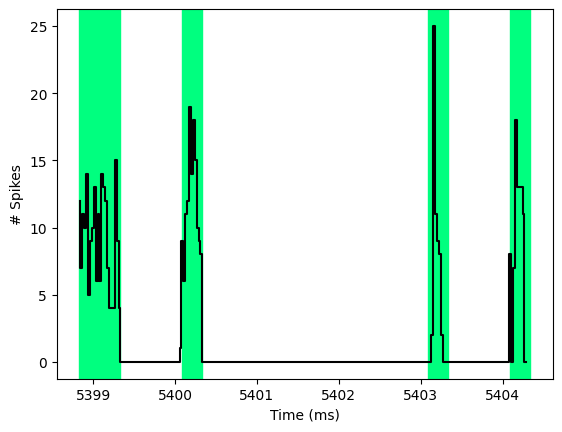

In [18]:
#Get the id of the presentation from the flashes table
number = 5
id0 = static_gratings.index.values[0]
idf = static_gratings.index.values[number-1]

#Then obtain all the rows in the spiketime table with presentation index in the interval [id0, idf]
#Spikes are very fast so even in 1ms we can have several!
mask = (spike_times_static["stimulus_presentation_id"] >= id0) & (spike_times_static["stimulus_presentation_id"] <= idf) 
spikes_first = spike_times_static[mask] 
del mask #Free memory

#To compute total firing rate, we compute number spikes/ unit time.
#Let's time bin all neurons without looking at who fired
#Notice that the spike times are the indices of this table!
first_spiket = spikes_first.index.values[0]
last_spiket = spikes_first.index.values[-1]

#Average time between spikes, "natural scale" to bin 
av_iei = np.mean(np.diff(spikes_first.index.values))
dt = 2*av_iei
bins = np.arange(first_spiket, last_spiket, dt) 
firingrate, edges = np.histogram(spikes_first.index.values, bins=bins)

#Obtain the intervals at which the stimulus happened 
staticstart = static_gratings["start_time"].values[:number]
staticend = static_gratings["stop_time"].values[:number]

plt.figure()
#Center the edges of our histogram and show the firing rate 
center_edges = (edges[:-1] + edges[1:])/2
plt.step(center_edges, firingrate, color="black")

#Let's mark where the stimulus happend with a colored area
for t0, tf in zip(staticstart, staticend):
    plt.axvspan(t0, tf, color="springgreen")

plt.xlabel("Time (ms)")
plt.ylabel("# Spikes")
plt.show()

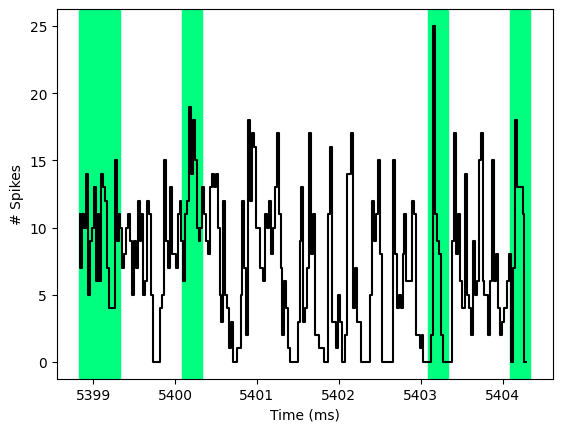

In [19]:
visam_spikes = np.array([])
for id in visam_ids:
    spikes = session2.spike_times[id]
    visam_spikes = np.concatenate((visam_spikes, spikes[(spikes > first_spiket) & (spikes < last_spiket)]))

#Computation of inter-event interval is the same as before
av_iei = np.mean(np.diff(spikes_first.index.values))
dt = 2*av_iei
bins = np.arange(first_spiket, last_spiket, dt) 
firingrate, edges = np.histogram(visam_spikes, bins=bins)

del visam_spikes


#Same image!
plt.figure()
center_edges = (edges[:-1] + edges[1:])/2
plt.step(center_edges, firingrate, color="black")

for t0, tf in zip(staticstart, staticend):
    plt.axvspan(t0, tf, color="springgreen")

plt.xlabel("Time (ms)")
plt.ylabel("# Spikes")
plt.show()
